<a href="https://colab.research.google.com/github/niteshydv01/ML-LAB-102217260/blob/main/ML_ASSAIGNMENT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

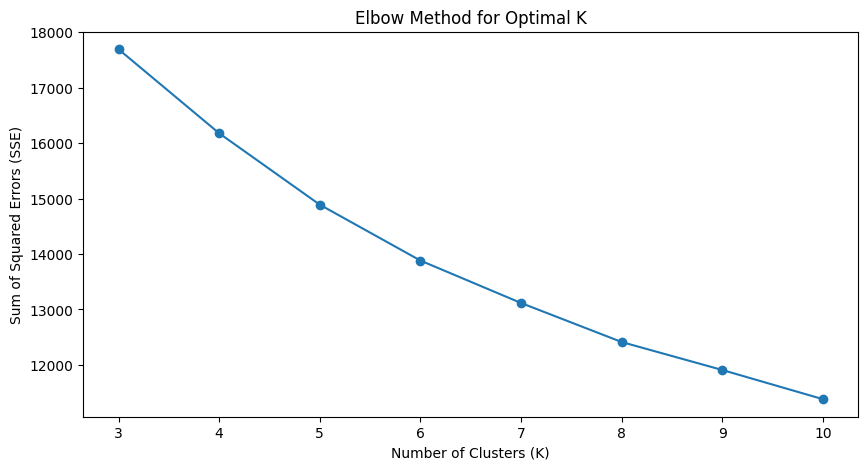

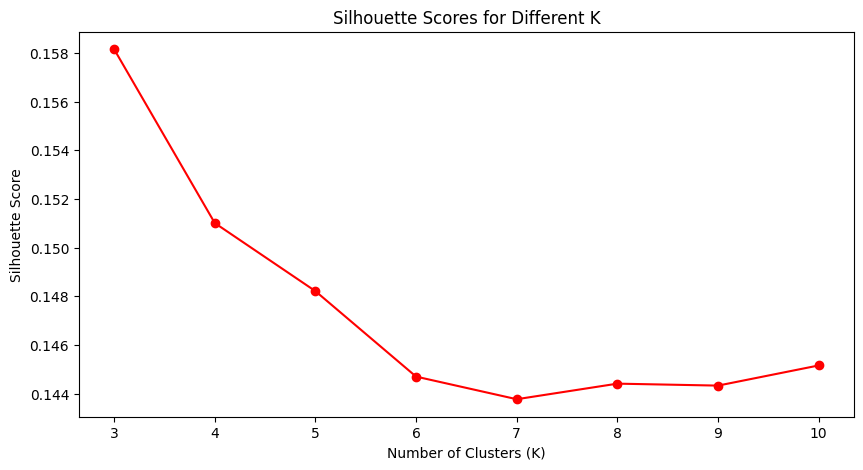

Optimal number of clusters based on silhouette score: 3


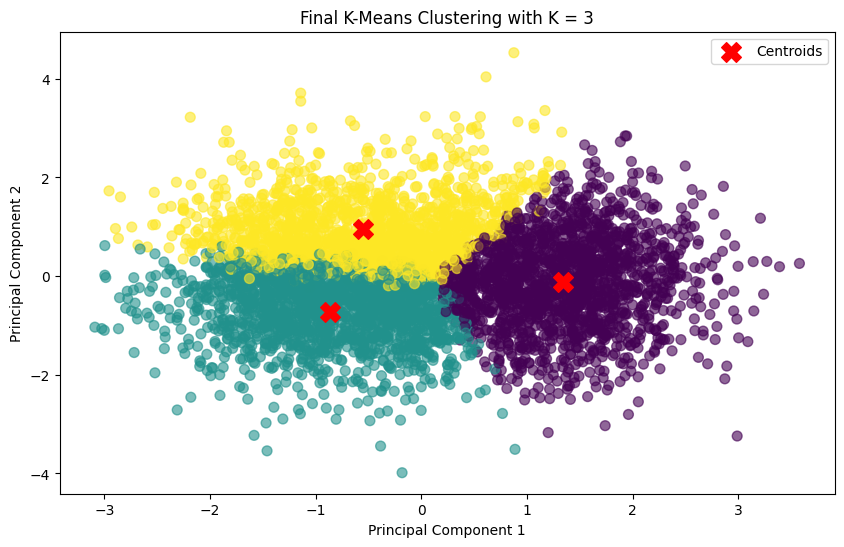

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


data = pd.read_csv("/content/USA_Housing (1).csv")

data = data.iloc[:, :-1]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


sse = []
silhouette_scores = []
k_values = range(3, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k}")


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


kmeans_final = KMeans(n_clusters=best_k, random_state=0)
kmeans_final.fit(data_scaled)
labels = kmeans_final.predict(data_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap="viridis", marker='o', s=50, alpha=0.6)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"Final K-Means Clustering with K = {best_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



Optimal number of clusters based on silhouette score: 9


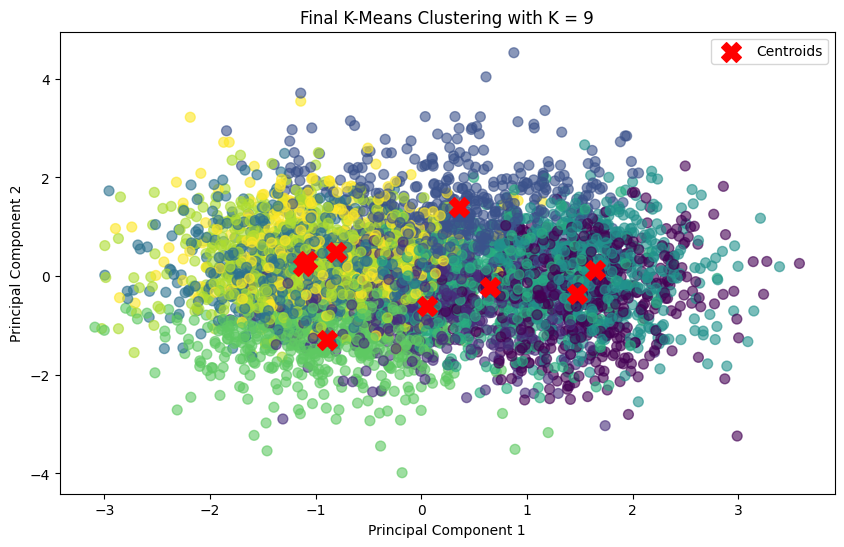

In [ ]:
best_k = 2
print(f"Optimal number of clusters based on silhouette score: {best_k}")


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

kmeans_final = KMeans(n_clusters=best_k, random_state=0)
kmeans_final.fit(data_scaled)
labels = kmeans_final.predict(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap="viridis", marker='o', s=50, alpha=0.6)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"Final K-Means Clustering with K = {best_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()